In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style="darkgrid", context="talk")
import scipy as sp
from IPython import embed as shell

In [2]:
#### Urai et al. (2018): pupil dilation and reaction times scale with decision uncertainty ####
data_urai2017 = pd.read_csv('https://ndownloader.figshare.com/files/12753785')
data_urai2017['choice']        = data_urai2017.resp
data_urai2017['coherence'].values[data_urai2017['coherence'] < 0.025] = 0.025
data_urai2017['evidence']      = data_urai2017.coherence * data_urai2017.stim # signed evidence

# normalize RT for each participant
zscore = lambda x: (x - x.mean()) / x.std()
data_urai2017['rt_norm'] = data_urai2017.groupby(['subjnr', 'sessionnr', 'blocknr'])['rt'].transform(zscore)
data_urai2017.sample(n=10)

stim  coherence  difficulty  motionstrength  resp    rt  correct  \
39300     1      0.050           2        0.792123     1  0.05        1   
16430     1      0.025           2        0.161577     1  0.65        1   
3985     -1      0.100           4       -1.752206    -1  0.64        1   
65737    -1      0.050           2       -0.691055    -1  0.90        1   
49322     1      0.200           4        3.613909     1  0.22        1   
48914     1      0.100           3        1.795537     1  0.31        1   
8657     -1      0.025           3       -0.113570    -1  0.43        1   
36417    -1      0.200           4       -3.630409    -1  0.47        1   
49629     1      0.100           3        1.650514     1  0.18        1   
37262    -1      0.100           3       -1.707209    -1  0.61        1   

       correctM  trialnr  blocknr  ...  int1motion  int2motion    rtNorm  \
39300         1       31        1  ...    12.76389   13.556010 -1.685062   
16430         1        8        1  ...    12.77648   12.938060  1.361576   
3985          1        3        1  ...    12.60000   10.847790  1.817184   
65737         1        8        2  ...    12.55692   11.865860  1.161021   
49322         1       11        3  ...    12.64670   16.260610 -0.744814   
48914         1        3        5  ...    12.45882   14.254360 -0.009580   
8657          1       40        4  ...    12.49590   12.382330 -0.234082   
36417         1       26        8  ...    12.43807    8.807656  0.741066   
49629         1       18        9  ...    12.56433   14.214840 -0.758023   
37262         1       40       10  ...    12.51204   10.804830  1.173899   

       decision_pupil  feedback_pupil  trialend_pupil  response_pupil  choice  \
39300       -1.049336       -2.080717       -1.167596       -2.184451       1   
16430       -1.297461       -1.146137       -1.626347       -0.382336       1   
3985        -0.304700        0.147742        0.266283        0.186367      -1   
65737       -2.374605       -1.645810       -3.411616       -0.261687      -1   
49322       -0.483269       -0.562147       -0.235599       -0.227805       1   
48914        0.264375        0.221614        0.294649       -0.102922       1   
8657        -1.391387       -1.637701       -1.310725        0.066378      -1   
36417        0.701511        1.089057        1.001576        0.270479      -1   
49629        0.646957        1.071606        1.002554        0.795497       1   
37262        0.427630       -0.293248       -0.298818        0.449275      -1   

       evidence   rt_norm  
39300     0.050 -1.287055  
16430     0.025  1.310834  
3985     -0.100  2.076629  
65737    -0.050  0.969360  
49322     0.200 -0.818381  
48914     0.100 -0.189037  
8657     -0.025 -0.303172  
36417    -0.200  0.458895  
49629     0.100 -0.801225  
37262    -0.100  1.117341  

[10 rows x 23 columns]

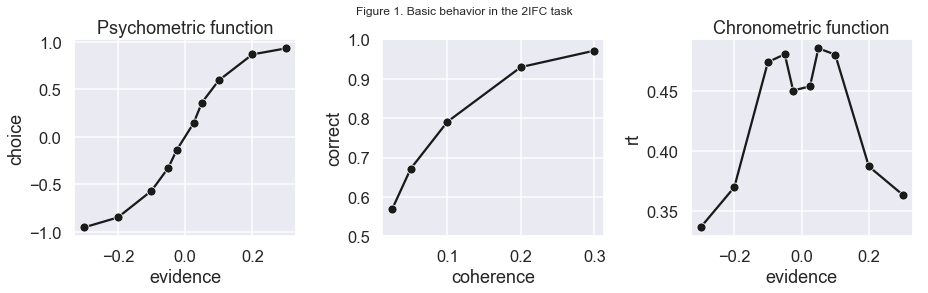

In [3]:
## FIRST, MAKE A QUICK OVERVIEW OF BASIC BEHAVIORAL DATA
fig, ax = plt.subplots(1, 3, figsize=(13,4))
sns.lineplot(data=data_urai2017, x='evidence', y='choice', color='k', marker='o', ci=None,  ax=ax[0])
ax[0].set(title='Psychometric function')
sns.lineplot(data=data_urai2017, x='coherence', y='correct', color='k', marker='o', ci=None, ax=ax[1])
ax[1].set(ylim=[0.5, 1])
sns.lineplot(data=data_urai2017, x='evidence', y='rt', color='k', marker='o', ci=None,ax=ax[2])
ax[2].set(title='Chronometric function')
fig.suptitle('Figure 1. Basic behavior in the 2IFC task', verticalalignment='baseline')
plt.tight_layout()

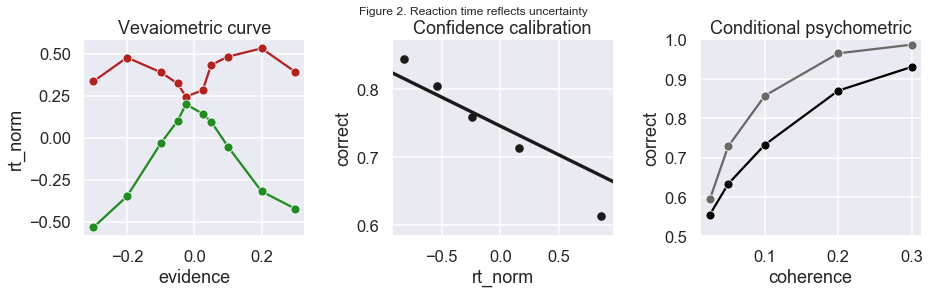

In [4]:
## RT reflects uncertainty
data_urai2017.loc[:,'rt_bin'] = pd.qcut(data_urai2017['rt_norm'], 2, labels=False) # median split

fig, ax = plt.subplots(1, 3, figsize=(13,4))
sns.lineplot(data=data_urai2017, x='evidence', y='rt_norm', hue='correct', marker='o', ax=ax[0], ci=None, palette={0:"firebrick", 1:"forestgreen"}, legend=False)
ax[0].set(title='Vevaiometric curve')
sns.regplot(data=data_urai2017, x='rt_norm', y='correct', x_bins=5, color='k', marker='o', ax=ax[1], ci=None)
ax[1].set(title='Confidence calibration')
sns.lineplot(data=data_urai2017, x='coherence', y='correct', hue='rt_bin', marker='o',ci=None, ax=ax[2], palette={0:"dimgrey", 1:"black"}, legend=False)
ax[2].set(title='Conditional psychometric', ylim=[0.5, 1])
fig.suptitle('Figure 2. Reaction time reflects uncertainty', verticalalignment='baseline')
plt.tight_layout()

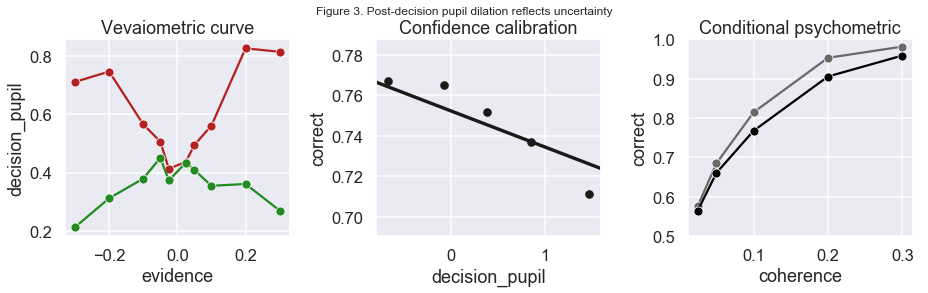

In [5]:
## Pupil reflects uncertainty
data_urai2017.loc[:,'pupil_bin'] = pd.qcut(data_urai2017['decision_pupil'], 2, labels=False) # median split

fig, ax = plt.subplots(1, 3, figsize=(13,4))
sns.lineplot(data=data_urai2017, x='evidence', y='decision_pupil', hue='correct', marker='o', ci=None, ax=ax[0], palette={0:"firebrick", 1:"forestgreen"}, legend=False)
ax[0].set(title='Vevaiometric curve')
sns.regplot(data=data_urai2017, x='decision_pupil', y='correct', x_bins=5, color='k', marker='o', ax=ax[1], ci=None)
ax[1].set(title='Confidence calibration')
sns.lineplot(data=data_urai2017, x='coherence', y='correct', hue='pupil_bin', marker='o', ci=None, ax=ax[2], palette={0:"dimgrey", 1:"black"}, legend=False)
ax[2].set(title='Conditional psychometric', ylim=[0.5, 1])
fig.suptitle('Figure 3. Post-decision pupil dilation reflects uncertainty', verticalalignment='baseline')
plt.tight_layout()


In [12]:
# RATHER THAN FITTING PSYCHOMETRIC FUNCTION SHIFTS, DO A QUICK HEURISTIC: REPETITION PROBABILITY
data_urai2017['repeat']              = 1 * (data_urai2017['resp'] == data_urai2017.resp.shift(1))
data_urai2017['previous_coherence']  = data_urai2017.coherence.shift(1)
data_urai2017['previous_choice']     = data_urai2017.choice.shift(1)
data_urai2017['previous_correct']    = data_urai2017.correct.shift(1)
data_urai2017['previous_rt']         = pd.qcut(data_urai2017.rt_norm.shift(1), 4, labels=False) 
data_urai2017['previous_pupil']      = pd.qcut(data_urai2017.decision_pupil.shift(1), 4, labels=False) 
data_urai2017.loc[:,'current_evidence'] = pd.qcut(data_urai2017['coherence'], 2, labels=False) # median split

In [14]:
## DEFINE UPDATING BASED ON THE PSYCHOMETRIC FUNCTION SHIFT
# from ibl_pipeline.analyses import behavior as behavioral_analyses
import psychofit as psy # https://github.com/cortex-lab/psychofit

def fit_psychfunc(df):
    choicedat = df.dropna(subset=['choice']) # ignore missed trials
    choicedat = choicedat.groupby('evidence').agg({'rt':'count', 'choice':'mean'}).reset_index()
    pars, L = psy.mle_fit_psycho(choicedat.values.transpose(), P_model='erf_psycho_2gammas', 
        parstart=np.array([choicedat['evidence'].mean(), 20., 0.05, 0.05]), 
        parmin=np.array([choicedat['evidence'].min(), 0., 0., 0.]), 
        parmax=np.array([choicedat['evidence'].max(), 100., 1, 1]))
    df2 = {'bias':pars[0],'threshold':pars[1], 'lapselow':pars[2], 'lapsehigh':pars[3]}
    return pd.DataFrame(df2, index=[0])

def updating(df, colname):
    
    # fit psychometric functions
    psychfuncfits = df.groupby(['previous_choice', colname]).apply(fit_psychfunc)
    # now subtract between the two previous choices
    for index, group in psychfuncfits.groupby(['colname']):
      df2['update'][psychfuncfits.index.isin(group.index)] = group[group['sample'] == 'ref'+ str(index.split('group')[1])]['value'].values[0] - group['value']
    
    return df2


In [15]:

df2 = updating(data_urai2017, 'previous_coherence')



AttributeError: module 'psychofit' has no attribute 'mle_fit_psycho'

In [ ]:
## HOW DO PUPIL, RT AND COHERENCE INDUCE UPDATING?
fig, ax = plt.subplots(1, 3, figsize=(13,4))
sns.lineplot(data=data_urai2017, x='previous_coherence', y='repeat', hue='previous_correct', style='current_evidence',
            ci=None, palette={0:"firebrick", 1:"forestgreen"}, legend=False, ax=ax[0], markers=True)
sns.lineplot(data=data_urai2017, x='previous_rt', y='repeat', hue='previous_correct', style='current_evidence',  markers=True,
             marker='o', ci=None, palette={0:"firebrick", 1:"forestgreen"}, legend=False, ax=ax[1])
sns.lineplot(data=data_urai2017, x='previous_pupil', y='repeat', hue='previous_correct', style='current_evidence',  markers=True,
             marker='o', ci=None, palette={0:"firebrick", 1:"forestgreen"}, legend=False, ax=ax[2])

fig.suptitle('Figure 4. Decision uncertainty reduces repetition', verticalalignment='baseline')
plt.tight_layout()